In [14]:
import numpy as np
import sympy as sp
import pandas as pd
from scipy import stats as st
from matplotlib import pyplot as plt
from scipy import optimize as opt
from statsmodels.stats.diagnostic import lilliefors
sp.init_printing(use_unicode=False, wrap_line=False, no_global=True)
from IPython.display import display, Markdown, Latex

file_path = 'data.xlsx'
data = pd.read_excel(file_path)
gpa = data.iloc[:, 0]  
gtk = data.iloc[:, 1]
gtk = gtk.dropna()

### –ó–∞–¥–∞–Ω–∏–µ 1.9. –¶–µ–Ω–∑—É—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –≤—ã–±–æ—Ä–∫–∏ ###

#### *1. –ú–µ—Ç–æ–¥–æ–º –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–≥–æ –ø—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–∏—è –æ—Ü–µ–Ω–∏—Ç–µ –ø–∞—Ä–∞–º–µ—Ç—Ä $\lambda$ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–∞—Ä–∞–±–æ—Ç–∫–∏ –ì–ü–ê –¥–æ –æ—Ç–∫–∞–∑–∞. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è –æ—Ü–µ–Ω–∫–∏, —Å—á–∏—Ç–∞—è –µ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º. –°—Ä–∞–≤–Ω–∏—Ç–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Å –æ—Ü–µ–Ω–∫–æ–π –±–µ–∑ —É—á–µ—Ç–∞ —Ü–µ–Ω–∑—É—Ä–∏—Ä–æ–≤–∞–Ω–Ω–æ—Å—Ç–∏ –≤—ã–±–æ—Ä–∫–∏* ####

–í –∏—Å–ø—ã—Ç–∞–Ω–∏—è—Ö —É—á–∞—Å—Ç–≤—É—é—Ç $n$ –æ–±—ä–µ–∫—Ç–æ–≤. –ú–æ–º–µ–Ω—Ç—ã –æ—Ç–∫–∞–∑–æ–≤ $t_i$ —Ä–µ–≥–∏—Å—Ç—Ä–∏—Ä—É—é—Ç—Å—è –≤ —Ç–µ—á–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–∏ $T$, –∑–∞—Ç–µ–º —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏—è –ø—Ä–µ–∫—Ä–∞—â–∞–µ—Ç—Å—è. –ü—Ä–∏ —Ä–∞—Å—á–µ—Ç–∞—Ö —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —É—á–∏—Ç—ã–≤–∞—Ç—å –Ω–µ —Ç–æ–ª—å–∫–æ –∑–Ω–∞—á–µ–Ω–∏—è $t_i$, –Ω–æ –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∞–≥—Ä–µ–≥–∞—Ç–æ–≤ $k$, –≤—Å–µ –µ—â–µ —Ä–∞–±–æ—Ç–æ—Å–ø–æ—Å–æ–±–Ω—ã—Ö –∫ –º–æ–º–µ–Ω—Ç—É $T$. –¢–∞–∫–∏–µ –≤—ã–±–æ—Ä–∫–∏ –Ω–∞–∑—ã–≤–∞—é—Ç—Å—è —Ü–µ–Ω–∑—É—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏.

–ú–µ—Ç–æ–¥–æ–º –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–≥–æ –ø—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–∏—è –º–æ–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å –æ—Ü–µ–Ω–∫—É –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ $\lambda$ —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –¥–ª—è —Ü–µ–Ω–∑—É—Ä–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏:
$$\widehat{\lambda}=\frac{n-k}{\sum{t_i}+kT}$$
–î–ª—è –±–æ–ª—å—à–∏—Ö –≤—ã–±–æ—Ä–æ–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ $\widehat{\lambda}$ –±–ª–∏–∑–∫–æ –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É –ø—Ä–∏—á—ë–º:
$$M\widehat{\lambda}=\lambda$$
$$D\widehat{\lambda}=\frac{\lambda^2}{(1-e^{-\lambda T})n}$$

In [15]:
T = 2*365*24
ts = gpa
sts = sum(ts)
n = 65
k = 5

In [16]:
lyambda_est = (n-k)/(sts+k*T)
lyambda = sp.symbols(r'\hat{\lambda}')
sp.Eq(lyambda, lyambda_est)

–°—á–∏—Ç–∞—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Ü–µ–Ω–∫–∏ –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º (–ø–æ —É—Å–ª–æ–≤–∏—é –∑–∞–¥–∞—á–∏):
$$\widehat{\lambda}\sim N(\lambda, \frac{\lambda^2}{(1-e^{-\lambda T})n})$$
$$\frac{\widehat{\lambda}-M\widehat{\lambda}}{\sqrt{D\widehat{\lambda}}}\sim N(0,1)$$

–î–ª—è –Ω–∞—Ö–æ–∂–¥–µ–Ω–∏—è –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞ —Å —É—Ä–æ–≤–Ω–µ–º –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ $\alpha$, –Ω–∞–π–¥—ë–º –∫–≤–∞–Ω—Ç–∏–ª–∏ $\frac{\alpha}{2}$ –∏ $(1-\frac{\alpha}{2})$ —É—Ä–æ–≤–Ω–µ–π —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–≥–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è: $c_{\frac{\alpha}{2}}$, $c_{1-\frac{\alpha}{2}}$.

–ò–∑ —É—Å–ª–æ–≤–∏—è —Å–∏–º–º–µ—Ç—Ä–∏–∏ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–≥–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è: $c_\frac{\alpha}{2}=-c_{1-\frac{\alpha}{2}}$

$$c_\frac{\alpha}{2}\le \frac{\widehat{\lambda}-M\widehat{\lambda}}{\sqrt{D\widehat{\lambda}}}\le c_{1-\frac{\alpha}{2}}$$
$$-c_{1-\frac{\alpha}{2}}\le \frac{\widehat{\lambda}-\lambda}{\sqrt{D\widehat{\lambda}}}\le c_{1-\frac{\alpha}{2}}$$
$$\widehat{\lambda}-c_{1-\frac{\alpha}{2}}\sqrt{D\widehat{\lambda}}\le \lambda\le \widehat{\lambda}+c_{1-\frac{\alpha}{2}}\sqrt{D\widehat{\lambda}}$$

In [17]:
var_lambda_est = lyambda_est**2 / ((1 - np.exp(-lyambda_est*T)) * n)
std_lambda_est = np.sqrt(var_lambda_est)
sqrt_D_lambda = sp.symbols(r'\sqrt{D\hat{\lambda}}')
sp.Eq(sqrt_D_lambda, std_lambda_est)

In [18]:
lyambda = sp.symbols('lambda')
alpha = 0.05
quantile = st.norm.ppf(1-alpha/2)
lower_bound = lyambda_est - quantile*std_lambda_est
upper_bound = lyambda_est + quantile*std_lambda_est
sp.And(sp.LessThan(lower_bound, lyambda), sp.LessThan(lyambda, upper_bound))

In [20]:
lyambda_nc_value = (n-k)/sts
display(Latex('$$\large{\widehat{\lambda}_{nc}=\\frac{n-k}{\sum{t_i}}='+format(lyambda_nc_value, '.8f')+'>'+format(lyambda_est, '.8f')+'=\widehat{\lambda}}$$'))

<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\kosti\AppData\Local\Temp\ipykernel_11500\3615372068.py:2: SyntaxWarning: invalid escape sequence '\l'
  display(Latex('$$\large{\widehat{\lambda}_{nc}=\\frac{n-k}{\sum{t_i}}='+format(lyambda_nc_value, '.8f')+'>'+format(lyambda_est, '.8f')+'=\widehat{\lambda}}$$'))
C:\Users\kosti\AppData\Local\Temp\ipykernel_11500\3615372068.py:2: SyntaxWarning: invalid escape sequence '\w'
  display(Latex('$$\large{\widehat{\lambda}_{nc}=\\frac{n-k}{\sum{t_i}}='+format(lyambda_nc_value, '.8f')+'>'+format(lyambda_est, '.8f')+'=\widehat{\lambda}}$$'))


<IPython.core.display.Latex object>

#### *2. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –æ—Ü–µ–Ω–∫—É –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –±–µ–∑–æ—Ç–∫–∞–∑–Ω–æ–π —Ä–∞–±–æ—Ç—ã –∞–≥—Ä–µ–≥–∞—Ç–æ–≤ –º–µ—Ç–æ–¥–æ–º –ö–∞–ø–ª–∞–Ω–∞-–ú–∞–π–µ—Ä–∞ –∏ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è –Ω–µ–µ. –°—Ä–∞–≤–Ω–∏—Ç–µ —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∏—á–µ—Å–∫–æ–π –æ—Ü–µ–Ω–∫–æ–π –Ω–∞ –æ—Å–Ω–æ–≤–µ —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è* ####

–ü—É—Å—Ç—å $n_i$ - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä–µ–∫—Ç–æ–≤, —Ä–∞–±–æ—Ç–æ—Å–ø–æ—Å–æ–±–Ω—ã—Ö –∫ –º–æ–º–µ–Ω—Ç—É $t_i$. –¢–æ–≥–¥–∞ –≤—ã–±–æ—Ä–æ—á–Ω–∞—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –±–µ–∑–æ—Ç–∫–∞–∑–Ω–æ–π —Ä–∞–±–æ—Ç—ã —Ä–∞–≤–Ω–∞
$$\widehat{R}(t)=\prod_{i|t_i\le t}{\left(1-\frac1{n_i}\right)}$$

–ò–∑–≤–µ—Å—Ç–Ω–æ, —á—Ç–æ $\widehat{R}(t)\in N(R(t), \sigma(t))$ –ø—Ä–∏ $n\to\infty$, –≥–¥–µ
$$\sigma^2(t)=R^2(t)\sum_{i|t_i\le t}{\frac1{n_i(n_i-1)}}$$
–ü—Ä–∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞ –º–æ–∂–Ω–æ –∑–∞–º–µ–Ω–∏—Ç—å $R(t)$ –Ω–∞ –µ—ë –æ—Ü–µ–Ω–∫—É $\widehat{R}(t)$

In [21]:
n_i = lambda t: n-len(ts[ts <= t])
R_est = lambda t: np.prod([(1-1/n_i(t_i)) for t_i in ts if t_i <= t])
def sigma_est(t):
    try:
        return R_est(t) * np.sqrt(sum([1/(n_i(t_i)*(n_i(t_i)-1)) for t_i in ts if t_i <= t]))
    except:
        return 0

$$\widehat{R}(t)-c_{1-\frac{\alpha}{2}}\sigma(t)\le R(t)\le \widehat{R}(t)+c_{1-\frac{\alpha}{2}}\sigma(t)$$

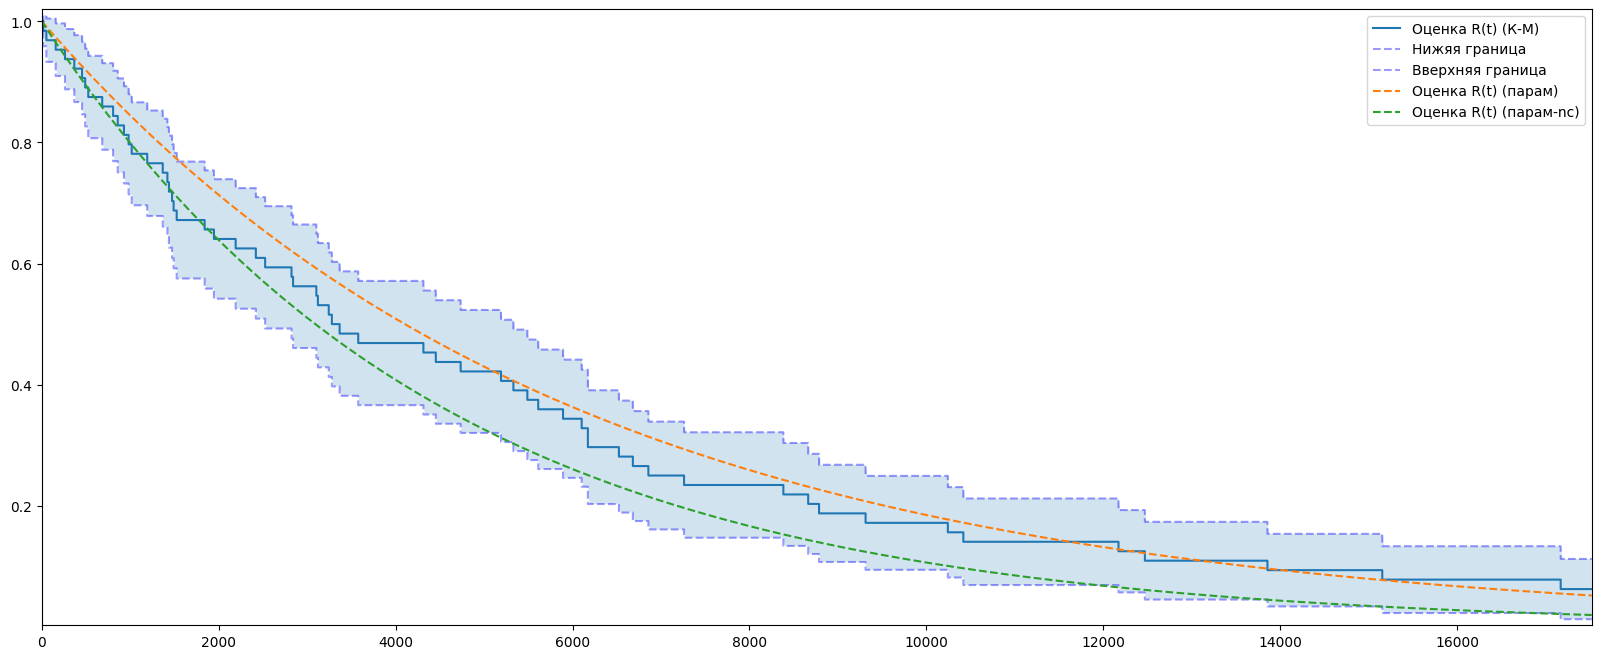

In [22]:
alpha = 0.1
quantile = st.norm.ppf(1-alpha/2)
lower_bound = lambda t: R_est(t) - quantile*sigma_est(t)
upper_bound = lambda t: R_est(t) + quantile*sigma_est(t)

t_vis = np.linspace(0, T, 1000)

lows = [lower_bound(t) for t in t_vis]
ups = [upper_bound(t) for t in t_vis]
ests = [R_est(t) for t in t_vis]
plt.subplots(figsize=(20, 8))
plt.step(t_vis, ests, label='–û—Ü–µ–Ω–∫–∞ R(t) (–ö-–ú)')
plt.step(t_vis, lows, 'b--', alpha=0.4, label='–ù–∏–∂—è—è –≥—Ä–∞–Ω–∏—Ü–∞')
plt.step(t_vis, ups, 'b--', alpha=0.4, label='–í–≤–µ—Ä—Ö–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞')
plt.fill_between(t_vis, lows, ups, alpha=0.2)
plt.xlim(0, T)
plt.ylim(min(lows)-1e-2, max(ups)+1e-2)

R_exp = lambda t: np.exp(-lyambda_est*t)
plt.plot(t_vis, R_exp(t_vis), '--', label='–û—Ü–µ–Ω–∫–∞ R(t) (–ø–∞—Ä–∞–º)')
R_exp_nc = lambda t: np.exp(-lyambda_nc_value*t)
plt.plot(t_vis, R_exp_nc(t_vis), '--', label='–û—Ü–µ–Ω–∫–∞ R(t) (–ø–∞—Ä–∞–º-nc)')

plt.legend()
plt.show()

#### *3. (\*) –î–æ–∫–∞–∂–∏—Ç–µ —Ñ–æ—Ä–º—É–ª—É (9.1).* ####

–í –∏—Å–ø—ã—Ç–∞–Ω–∏—è—Ö —É—á–∞—Å—Ç–≤—É—é—Ç $n$ –æ–±—ä–µ–∫—Ç–æ–≤. –ú–æ–º–µ–Ω—Ç—ã –æ—Ç–∫–∞–∑–æ–≤ $t_i$ —Ä–µ–≥–∏—Å—Ç—Ä–∏—Ä—É—é—Ç—Å—è –≤ —Ç–µ—á–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–∏ $T$, –∑–∞—Ç–µ–º —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏—è –ø—Ä–µ–∫—Ä–∞—â–∞–µ—Ç—Å—è. –ü—Ä–∏ —Ä–∞—Å—á–µ—Ç–∞—Ö —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —É—á–∏—Ç—ã–≤–∞—Ç—å –Ω–µ —Ç–æ–ª—å–∫–æ –∑–Ω–∞—á–µ–Ω–∏—è $t_i$, –Ω–æ –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∞–≥—Ä–µ–≥–∞—Ç–æ–≤ $k$, –≤—Å–µ –µ—â–µ —Ä–∞–±–æ—Ç–æ—Å–ø–æ—Å–æ–±–Ω—ã—Ö –∫ –º–æ–º–µ–Ω—Ç—É $T$. –¢–∞–∫–∏–µ –≤—ã–±–æ—Ä–∫–∏ –Ω–∞–∑—ã–≤–∞—é—Ç—Å—è —Ü–µ–Ω–∑—É—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏.

–ú–µ—Ç–æ–¥–æ–º –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–≥–æ –ø—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–∏—è –º–æ–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å –æ—Ü–µ–Ω–∫—É –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ $\lambda$ —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –¥–ª—è —Ü–µ–Ω–∑—É—Ä–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏:
$$\widehat{\lambda}=\frac{n-k}{\sum{t_i}+kT}$$

–î–∞–Ω–∞ –≤—ã–±–æ—Ä–∫–∞ $\lbrace t\rbrace=t_1, t_2, ..., t_n$, —Å–¥–µ–ª–∞–µ–º –æ—Ü–µ–Ω–∫—É –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ $\lambda$ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è (–ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º $\tau_i\sim E_\lambda$).\
–ü—Ä–∏—á—ë–º $t_{n-k+1},...,t_n$ –±–æ–ª—å—à–µ $T$.

–¶–µ–Ω–∑—É—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ: –î–ª—è —ç–ª–µ–º–µ–Ω—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ –æ—Ç–∫–∞–∑–∞–ª–∏ –∫ –≤—Ä–µ–º–µ–Ω–∏ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è ùëá (—Ç–æ –µ—Å—Ç—å –º—ã –∑–Ω–∞–µ–º –ª–∏—à—å, —á—Ç–æ –æ–±—ä–µ–∫—Ç ¬´–ø—Ä–æ–∂–∏–ª¬ª –Ω–µ –º–µ–Ω–µ–µ –≤—Ä–µ–º–µ–Ω–∏ ùëá), –≤–Ω–æ—Å—è—Ç –≤ –ø—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–∏–µ —Ñ–∞–∫—Ç–æ—Ä, —Ä–∞–≤–Ω—ã–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ ¬´–¥–æ–∂–∏—Ç—å¬ª –¥–æ –º–æ–º–µ–Ω—Ç–∞ T –±–µ–∑ –æ—Ç–∫–∞–∑–∞.

–ë—É–¥–µ–º –∏—Å–∫–∞—Ç—å —Ñ.–ø. –∫–∞–∫ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —Ç–æ–≥–æ, —á—Ç–æ –≤—ã–±–æ—Ä–∫–∞ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∞ –ø—Ä–∞–≤–∏–ª—å–Ω—ã–º –æ–±—Ä–∞–∑–æ–º

$$\begin{aligned}
L=L(\lambda,\{t_i\})=\prod^n_{i=1}{P_\lambda\{\xi_i=t_i\}}&=\left(\prod^{n-k}_{i=1}{P_\lambda\{\xi_i=t_i\}}\right)\cdot\left(\prod^n_{i=n-k+1}{P_\lambda\{\xi_i>T\}}\right)=\\
=\prod^{n-k}_{i=1}{f(\lambda, t_i)}\cdot (R(\lambda, T))^k&=\prod^{n-k}_{i=1}{(\lambda e^{-\lambda t_i})}\cdot(e^{-\lambda T})^k=\\
=\lambda^{n-k}e^{-\lambda\sum{t_i}}\cdot e^{-k\lambda T}&=\lambda^{n-k}e^{-\lambda(\sum{t_i}+kT)}
\end{aligned}$$

$$\begin{aligned}
L(\lambda, \{t\})&=\lambda^{n-k}e^{-\lambda(\sum{t_i}+kT)}\\
\ln{L(\lambda, \{t\})}&=(n-k)\ln\lambda-\lambda(\sum{t_i}+kT)\\
\frac{\partial\ln{L(\lambda, \{t\})}}{\partial\lambda}&=\frac{n-k}\lambda-(\sum{t_i}+kT)\\
\frac{\partial^2ln{L(\lambda, \{t\})}}{\partial\lambda^2}&=-\frac{n-k}{\lambda^2}
\end{aligned}$$

$$\begin{cases}
\frac{\partial\ln{L(\lambda, \{t_i\})}}{\partial\lambda}=0\\
\frac{\partial^2ln{L(\lambda, \{t_i\})}}{\partial\lambda^2}<0
\end{cases}\Rightarrow
\begin{cases}
\frac{n-k}\lambda-(\sum{t_i}+kT)=0\\
-\frac{n-k}{\lambda^2}<0
\end{cases}\Rightarrow
\begin{cases}
\lambda=\frac{n-k}{\sum{t_i}+kT}\\
\frac{n-k}{\lambda^2}>0
\end{cases}\Rightarrow
\widehat\lambda=\frac{n-k}{\sum{t_i}+kT}$$

#### *4. (\*) –î–æ–∫–∞–∂–∏—Ç–µ —Ñ–æ—Ä–º—É–ª—É (9.2).* ####

–î–ª—è –±–æ–ª—å—à–∏—Ö –≤—ã–±–æ—Ä–æ–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ $\widehat{\lambda}$ –±–ª–∏–∑–∫–æ –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É –ø—Ä–∏—á—ë–º:
$$D\widehat{\lambda}=\frac{\lambda^2}{(1-e^{-\lambda T})n}$$

–ò–∑ ‚Ññ3 –∏–∑–≤–µ—Å—Ç–Ω–∞ —Ñ—É–Ω–∫—Ü–∏—è –ø—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–∏—è:
$$\begin{aligned}
L(\lambda, \{t\})&=\lambda^{n-k}e^{-\lambda(\sum{t_i}+kT)}\\
\ln{L(\lambda, \{t\})}&=(n-k)\ln\lambda-\lambda(\sum{t_i}+kT)\\
\frac{\partial\ln{L(\lambda, \{t\})}}{\partial\lambda}&=\frac{n-k}\lambda-(\sum{t_i}+kT)\\
\frac{\partial^2ln{L(\lambda, \{t\})}}{\partial\lambda^2}&=-\frac{n-k}{\lambda^2}
\end{aligned}$$

–ò–∑ –∫—É—Ä—Å–∞ –º–∞—Ç.—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ (–í.–í. –†—ã–∫–æ–≤, –í.–Æ. –ò—Ç–∫–∏–Ω –ú–∞—Ç.—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞, –ø. 7.5):
$$D\widehat\lambda=\frac1{ni(\lambda)}=\frac1{M\left(\frac{\partial\ln L(\lambda,\{t\})}{\partial\lambda}\right)^2}=\frac1{-M\left(\frac{\partial^2\ln L(\lambda,\{t\})}{\partial\lambda^2}\right)}$$
$$-M\left(\frac{\partial^2\ln L(\lambda,\{t\})}{\partial\lambda^2}\right)=M\left(\frac{n-k}{\lambda^2}\right)=\frac{M(n-k)}{\lambda^2}$$

–í –≤–∏–¥—É —Ü–µ–Ω–∑–æ—Ä–∏—Ä–æ–≤–∞–Ω–∏—è —Ç–∏–ø–∞ $I$ –∏–º–µ–µ–º $n-k$ - —Å–ª—É—á–∞–π–Ω—É—é –≤–µ–ª–∏—á–∏–Ω—É, –ø—Ä–∏—á—ë–º 
$$\begin{aligned}
(n-k)&\sim Bi^n_{1-e^{-\lambda T}}\\
M(n-k)&=n(1-e^{-\lambda T})
\end{aligned}$$

$$-M\left(\frac{\partial^2\ln L(\lambda,\{t\})}{\partial\lambda^2}\right)=\frac{n(1-e^{-\lambda T})}{\lambda^2}$$
$$D\widehat\lambda=\frac{\lambda^2}{(1-e^{-\lambda T})n}$$